In [73]:
import numpy as np
from scipy.integrate import quad
p = 0.85
w = 3*np.pi/p

def f(x, w):
    return -2*np.exp(-(w*x)/2)*np.sin(w*x)

a0 = 2/p*quad(lambda x: f(x, w), 0, p)[0]
q0 = a0/2

a, b, q = [], [], [q0]
num_coeffs = 50
for n in range(1, num_coeffs + 1):
    an = 2/p*quad(lambda x: f(x, w)*np.cos(2*n*np.pi*(x - p/2)/p), 0, p)[0]
    bn = 2/p*quad(lambda x: f(x, w)*np.sin(2*n*np.pi*(x - p/2)/p), 0, p)[0]
    qn = 1/2*(an - 1j*bn)

    a.append(an)
    b.append(bn)
    q.append(qn)

a = np.array(a)
b = np.array(b)

print(q)







[-0.1712903234806839, (0.15775149763041102-0.13055296355620225j), (0.054954306407498967+0.13883193197683946j), (-0.050924150223987115-0.03703574561744516j), (0.030265954955600378+0.013770292302074081j), (-0.019486294588598407-0.006586916480652942j), (0.01352171405587412+0.00366690550667766j), (-0.009917836330690042-0.0022546637395884886j), (0.007581791713034144+0.0014869295290116692j), (-0.005983151973617985-0.0010330622112722128j), (0.004841621968416382+0.0007472599822637091j), (-0.003998255989816982-0.000558191211693096j), (0.003357584630507782+0.0004280585983116655j), (-0.0028594888343184324-0.00033552482749430216j), (0.002464589977461357+0.0002679075485044111j), (-0.002146222927037943-0.00021733903058606373j), (0.0018858112107544049+0.00017875870277206816j), (-0.0016700918085500698-0.00014880922862817666j), (0.0014893903471573492+0.00012520269117957528j), (-0.001336515824423664-0.00010634290977802842j), (0.0012060330336161108+9.109297500171833e-05j), (-0.0010937720765818843-7.86280

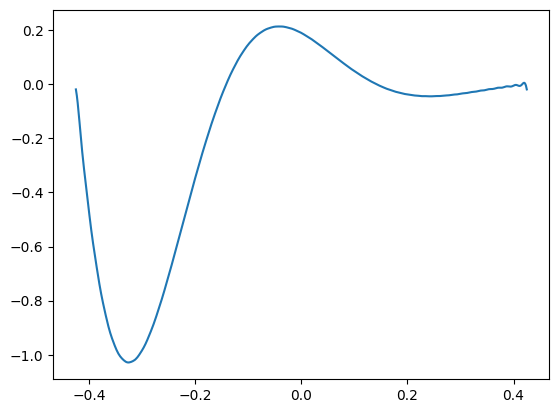

In [74]:
import matplotlib.pyplot as plt
xsp = np.linspace(-p/2, p/2, 500)
def approxf(x):
    val = a0/2
    for n in range(num_coeffs):
        val += a[n]*np.cos(2*(n + 1)*np.pi*x/p) + b[n]*np.sin(2*(n + 1)*np.pi*x/p)
    return val

plt.plot(xsp, approxf(xsp))

In [87]:
rho = 1
omega0 = 2*np.pi/p
mu = 1
R = 0.0254
nu = mu/rho

In [76]:
def J0(x):
    from math import factorial as fact
    op = 0
    for i in range(10):
        op += ((-1) ** i) * (x **(2 * i))/((fact(i) ** 2) * (4 ** i))
    return op

In [77]:
def lmda(omega) :
    return np.sqrt(omega/(2*nu))*(1+1j)

In [78]:
def u(t, r):
    v = 0
    for n in range(1, num_coeffs + 1):
        v += np.real(q[n]*1j/(rho*n*omega0)*(1 - (J0(1j*lmda(n*omega0)*r))/(J0(1j*lmda(n*omega0)*R)))*np.exp(1j*n*omega0*t))
    return q0/(4*mu)*(r + R)*(r - R) + v
    

In [90]:
def vel(t,r):
    #u_0 = lambda r: q0/(4*mu)*(r - R)*(r + R)
    #u = u_0
    u = 0
    for i in range(1,51):
        u += np.real(q[i]*1j/(rho*i*omega0)*(1 - J0(1j*lmda(i*omega0)*r)/J0(1j*lmda(i*omega0)*R))*np.exp(1j*i*omega0*t))
    return u + q0/(4*mu)*(r - R)*(r + R)

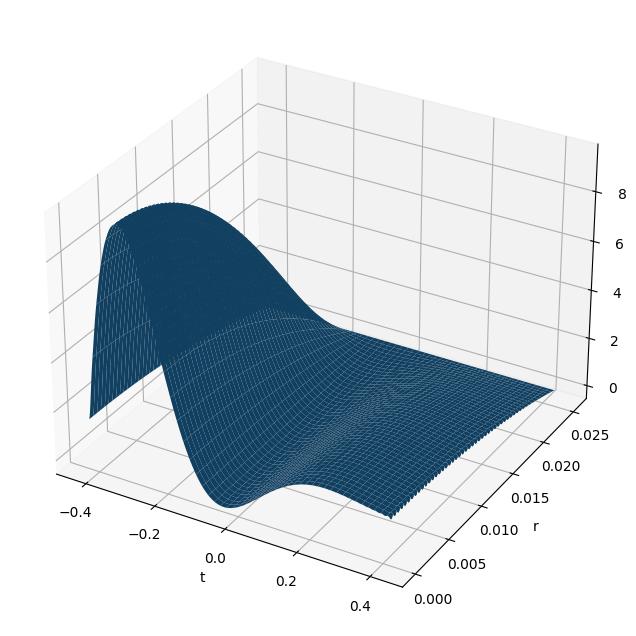

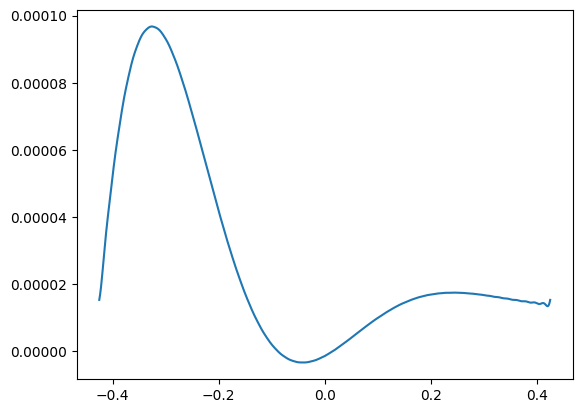

In [93]:
Nt, Nr = 1000, 1000
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
tt = np.linspace(-p/2,p/2,Nt)
rr = np.linspace(0,R,Nr)
t_list, r_list = np.meshgrid(tt,rr)
u1 = vel(tt[:,None],rr[None,:])
ax.plot_surface(t_list.T, r_list.T, u1)
ax.set_xlabel('t')
ax.set_ylabel('r')
ax.set_zlabel('u')
plt.show()
#print(u1)
#for k in range(10):
plt.plot(tt,u1[:,0]) #u1[i,j] = v[i*0.85/1000,j]